https://www.analyticsvidhya.com/blog/2021/06/analyze-cricket-data-with-python-a-hands-on-guide/

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
# reading the dataset
df = pd.read_excel('MS_Dhoni_ODI_record.xlsx')

IMPORTS AND PULL IN DATA DONE

In [3]:
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,2004-12-23,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,2004-12-26,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,2004-12-27,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,2005-04-02,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,2005-04-05,ODI # 2236
...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,v West Indies,Manchester,2019-06-27,ODI # 4175
346,42*,42,31,135.48,4,1,v England,Birmingham,2019-06-30,ODI # 4179
347,35,35,33,106.06,4,0,v Bangladesh,Birmingham,2019-07-02,ODI # 4182
348,DNB,-,-,-,-,-,v Sri Lanka,Leeds,2019-07-06,ODI # 4187


***350 records listed & 10 columns/parameters available***

In [4]:
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,2004-12-23,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,2004-12-26,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,2004-12-27,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,2005-04-02,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,2005-04-05,ODI # 2236


Remove 'v' from opposition 

In [5]:
df['opposition'] = df['opposition'].apply(lambda x: x[2:])

In [6]:
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236


In [7]:
df['year'] = df['date'].dt.year.astype(int)

To get just the year part from date.

In [8]:
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005


In [9]:
# creating a feature for being not out
df['score'] = df['score'].apply(str)
df['not_out'] = np.where(df['score'].str.endswith('*'), 1, 0)

New column with 1 to indicate NOT OUT and 0 to indicate OUT

In [10]:
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005,0


In [11]:
# dropping those innings where Dhoni did not bat and storing in a new DataFrame
df_new = df.loc[((df['score'] != 'DNB') & (df['score'] != 'TDNB')), 'runs_scored':]

In [12]:
df_new

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year,not_out
0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004,0
2,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005,0
...,...,...,...,...,...,...,...,...,...,...,...
344,28,52,53.84,3,0,Afghanistan,Southampton,2019-06-22,ODI # 4169,2019,0
345,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,ODI # 4175,2019,1
346,42,31,135.48,4,1,England,Birmingham,2019-06-30,ODI # 4179,2019,1
347,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,ODI # 4182,2019,0


In [14]:
# fixing the data types of numerical columns
df_new['runs_scored'] = df_new['runs_scored'].astype(int)
df_new['balls_faced'] = df_new['balls_faced'].astype(int)
df_new['strike_rate'] = df_new['strike_rate'].astype(float)
df_new['fours'] = df_new['fours'].astype(int)
df_new['sixes'] = df_new['sixes'].astype(int)

In [15]:
df_new

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year,not_out
0,0,1,0.00,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004,0
2,7,2,350.00,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005,0
...,...,...,...,...,...,...,...,...,...,...,...
344,28,52,53.84,3,0,Afghanistan,Southampton,2019-06-22,ODI # 4169,2019,0
345,56,61,91.80,3,2,West Indies,Manchester,2019-06-27,ODI # 4175,2019,1
346,42,31,135.48,4,1,England,Birmingham,2019-06-30,ODI # 4179,2019,1
347,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,ODI # 4182,2019,0


UNDERSTAND AND MAKE DATA CLEAN & PREP FOR ANALYSIS DONE

In [17]:
first_match_date = df['date'].dt.date.min().strftime('%B %d, %Y') # first match
print('First match:', first_match_date)
last_match_date = df['date'].dt.date.max().strftime('%B %d, %Y') # last match
print('Last match:', last_match_date)
number_of_matches = df.shape[0] # number of mathces played in career
print('Number of matches played:', number_of_matches)
number_of_inns = df_new.shape[0] # number of innings
print('Number of innings played:', number_of_inns)
not_outs = df_new['not_out'].sum() # number of not outs in career
print('Not outs:', not_outs)
runs_scored = df_new['runs_scored'].sum() # runs scored in career
print('Runs scored in career:', runs_scored)
balls_faced = df_new['balls_faced'].sum() # balls faced in career
print('Balls faced in career:', balls_faced)
career_sr = (runs_scored / balls_faced)*100 # career strike rate
print('Career strike rate: {:.2f}'.format(career_sr))
career_avg = (runs_scored / (number_of_inns - not_outs)) # career average
print('Career average: {:.2f}'.format(career_avg))
highest_score_date = df_new.loc[df_new.runs_scored == df_new.runs_scored.max(), 'date'].values[0]
highest_score = df.loc[df.date == highest_score_date, 'score'].values[0] # highest score
print('Highest score in career:', highest_score)
hundreds = df_new.loc[df_new['runs_scored'] >= 100].shape[0] # number of 100s
print('Number of 100s:', hundreds)
fifties = df_new.loc[(df_new['runs_scored']>=50)&(df_new['runs_scored']<100)].shape[0] #number of 50s
print('Number of 50s:', fifties)
fours = df_new['fours'].sum() # number of fours in career
print('Number of 4s:', fours)
sixes = df_new['sixes'].sum() # number of sixes in career
print('Number of 6s:', sixes)

First match: December 23, 2004
Last match: July 09, 2019
Number of matches played: 350
Number of innings played: 297
Not outs: 84
Runs scored in career: 10773
Balls faced in career: 12303
Career strike rate: 87.56
Career average: 50.58
Highest score in career: 183*
Number of 100s: 10
Number of 50s: 73
Number of 4s: 826
Number of 6s: 229


In [19]:
df['date'].dt.date

0      2004-12-23
1      2004-12-26
2      2004-12-27
3      2005-04-02
4      2005-04-05
          ...    
345    2019-06-27
346    2019-06-30
347    2019-07-02
348    2019-07-06
349    2019-07-09
Name: date, Length: 350, dtype: object

In [21]:
df['date'].min()

Timestamp('2004-12-23 00:00:00')

This gives us a good glimpse of MS Dhoni’s overall career. He started playing in 2004, and last played an ODI in 2019. In a career spanning over 15 years, he has scored 10 hundred and an astonishing 73 fifties. He has scored over 10,000 runs in his career at an average of 50.6 and a strike rate of 87.6. His highest score is 183*.

We will now do a more thorough analysis of his performance against different teams. We will also look at his year-on-year performance. We will take the help of visualizations for this.

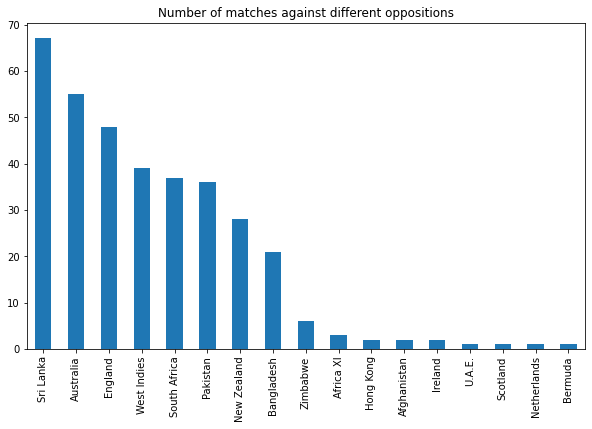

In [24]:
# number of matches played against different oppositions
df['opposition'].value_counts().plot(kind='bar', title='Number of matches against different oppositions', figsize=(10, 6));

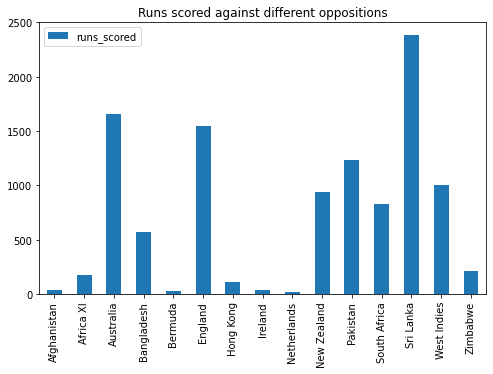

In [25]:
runs_scored_by_opposition = pd.DataFrame(df_new.groupby('opposition')['runs_scored'].sum())
runs_scored_by_opposition.plot(kind='bar', title='Runs scored against different oppositions', figsize=(8, 5))
plt.xlabel(None);

We can see that Dhoni has scored the most runs against Sri Lanka, followed by Australia, England, and Pakistan. He has also played a lot of matches against these teams, so it makes sense.

To get a clearer picture, let us look at his batting average against each team. The following piece of code will help us with getting the desired result:

In [26]:
innings_by_opposition = pd.DataFrame(df_new.groupby('opposition')['date'].count())
not_outs_by_opposition = pd.DataFrame(df_new.groupby('opposition')['not_out'].sum())
temp = runs_scored_by_opposition.merge(innings_by_opposition, left_index=True, right_index=True)
average_by_opposition = temp.merge(not_outs_by_opposition, left_index=True, right_index=True)
average_by_opposition.rename(columns = {'date': 'innings'}, inplace=True)
average_by_opposition['eff_num_of_inns'] = average_by_opposition['innings'] - average_by_opposition['not_out']
average_by_opposition['average'] = average_by_opposition['runs_scored'] / average_by_opposition['eff_num_of_inns']
average_by_opposition.replace(np.inf, np.nan, inplace=True)
major_nations = ['Australia', 'England', 'New Zealand', 'Pakistan', 'South Africa', 'Sri Lanka', 'West Indies']

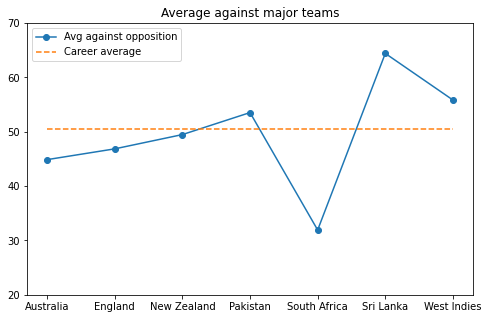

In [27]:
plt.figure(figsize = (8, 5))
plt.plot(average_by_opposition.loc[major_nations, 'average'].values, marker='o')
plt.plot([career_avg]*len(major_nations), '--')
plt.title('Average against major teams')
plt.xticks(range(0, 7), major_nations)
plt.ylim(20, 70)
plt.legend(['Avg against opposition', 'Career average']);

As we can see, Dhoni has performed remarkably against tough teams like Australia, England, and Sri Lanka. His average against these teams is either close to his career average, or slightly higher. The only team against whom he has not performed well is South Africa.

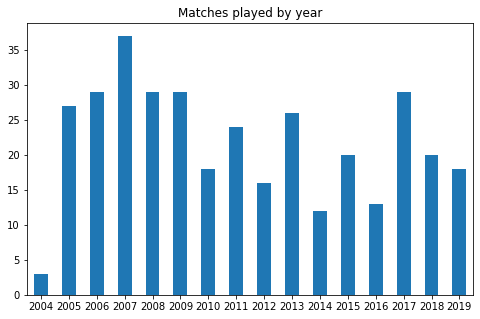

In [28]:
df['year'].value_counts().sort_index().plot(kind='bar', title='Matches played by year', figsize=(8, 5))
plt.xticks(rotation=0);

We should also look at how many runs he has scored every year. The code for that will be:


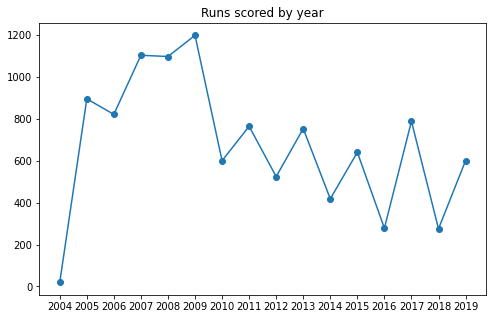

In [29]:

df_new.groupby('year')['runs_scored'].sum().plot(kind='line', marker='o', title='Runs scored by year', figsize=(8, 5))
years = df['year'].unique().tolist()
plt.xticks(years)
plt.xlabel(None);